In [3]:
import torch


device = ("cuda" if torch.cuda.is_available() else "cpu")
device

'cuda'

## Classification

In [1]:
from datasets import load_dataset

pokemon_dataset = load_dataset("keremberke/pokemon-classification", "full")

/home/voorhs/.pyenv/versions/.sirius-lectures/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pokemon_dataset

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 4869
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1390
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 732
    })
})

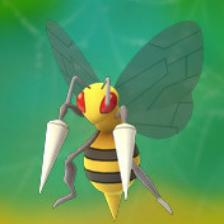

In [3]:
img = pokemon_dataset["train"][300]["image"]
img

In [4]:
from transformers import pipeline

img_clf_pipeline = pipeline(task="image-classification", model="stevanojs/pokemon_classification")

Device set to use cuda:0


In [5]:
img_clf_pipeline(img)

[{'label': 'Beedrill', 'score': 0.9966261386871338},
 {'label': 'Electabuzz', 'score': 0.6475741267204285},
 {'label': 'Pinsir', 'score': 0.6391554474830627},
 {'label': 'Farfetchd', 'score': 0.6377938389778137},
 {'label': 'Flareon', 'score': 0.6299159526824951}]

#### 571 ####
[{'label': 'Squirtle', 'score': 0.9976029992103577},
 {'label': 'Wartortle', 'score': 0.8723291158676147},
 {'label': 'Cubone', 'score': 0.665715754032135},
 {'label': 'Nidorina', 'score': 0.6267998218536377},
 {'label': 'Blastoise', 'score': 0.619769275188446}]


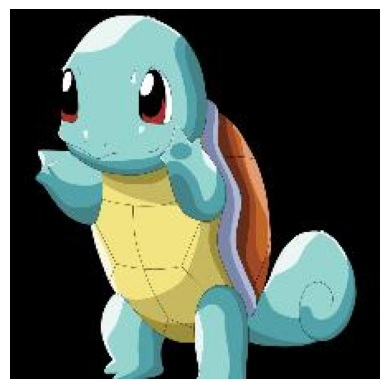

#### 654 ####
[{'label': 'Staryu', 'score': 0.997329831123352},
 {'label': 'Starmie', 'score': 0.859411895275116},
 {'label': 'Jolteon', 'score': 0.7406260967254639},
 {'label': 'Zapdos', 'score': 0.7348490953445435},
 {'label': 'Pikachu', 'score': 0.7043949961662292}]


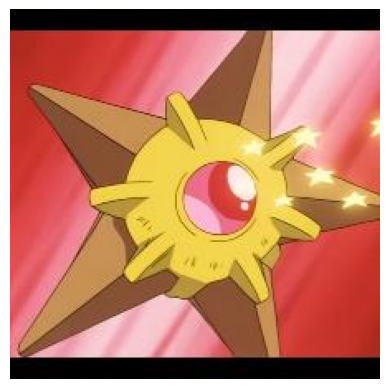

#### 155 ####
[{'label': 'Scyther', 'score': 0.9976745247840881},
 {'label': 'Metapod', 'score': 0.8412181735038757},
 {'label': 'Golbat', 'score': 0.6922124624252319},
 {'label': 'Aerodactyl', 'score': 0.6744895577430725},
 {'label': 'Bulbasaur', 'score': 0.6641728281974792}]


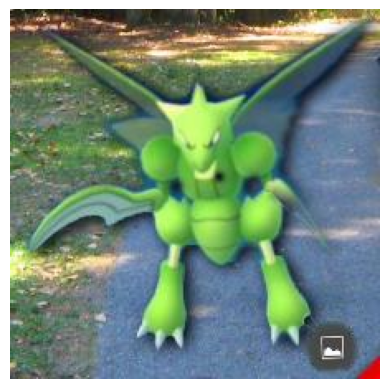

In [6]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

dataset_size = len(pokemon_dataset["test"])
for i in random.sample(range(dataset_size), k=3):
    print(f"#### {i} ####")
    img = pokemon_dataset["test"][i]["image"]
    pprint(img_clf_pipeline(img))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained(
    "stevanojs/pokemon_classification",
).to(device)

In [8]:
dataset_names = pokemon_dataset["train"].features["labels"].names
dataset_names[:10]

['Porygon',
 'Goldeen',
 'Hitmonlee',
 'Hitmonchan',
 'Gloom',
 'Aerodactyl',
 'Mankey',
 'Seadra',
 'Gengar',
 'Venonat']

In [9]:
model_names = model.config.id2label
model_names

{0: 'Golbat',
 1: 'Machoke',
 10: 'Raichu',
 100: 'Dragonite',
 101: 'Fearow',
 102: 'Slowpoke',
 103: 'Weezing',
 104: 'Beedrill',
 105: 'Weedle',
 106: 'Cloyster',
 107: 'Vaporeon',
 108: 'Gyarados',
 109: 'Golduck',
 11: 'Zapdos',
 110: 'Machamp',
 111: 'Hitmonlee',
 112: 'Primeape',
 113: 'Cubone',
 114: 'Sandslash',
 115: 'Scyther',
 116: 'Haunter',
 117: 'Metapod',
 118: 'Tentacruel',
 119: 'Aerodactyl',
 12: 'Raticate',
 120: 'Kabutops',
 121: 'Ninetales',
 122: 'Zubat',
 123: 'Rhydon',
 124: 'Mew',
 125: 'Pinsir',
 126: 'Ditto',
 127: 'Victreebel',
 128: 'Omanyte',
 129: 'Horsea',
 13: 'Magnemite',
 130: 'Pikachu',
 131: 'Blastoise',
 132: 'Venomoth',
 133: 'Charizard',
 134: 'Seadra',
 135: 'Muk',
 136: 'Spearow',
 137: 'Bulbasaur',
 138: 'Bellsprout',
 139: 'Electrode',
 14: 'Ivysaur',
 140: 'Gloom',
 141: 'Poliwhirl',
 142: 'Flareon',
 143: 'Seaking',
 144: 'Hypno',
 145: 'Wartortle',
 146: 'Mankey',
 147: 'Tentacool',
 148: 'Exeggcute',
 149: 'Meowth',
 15: 'Growlithe',
 16

In [10]:
sample = pokemon_dataset["test"][2]

127 Alakazam


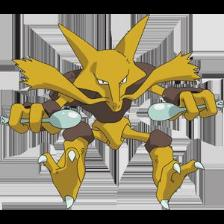

In [11]:
img = sample["image"]
label = sample["labels"]
print(label, dataset_names[label])
img

In [ ]:
from transformers import AutoImageProcessor

processor = AutoImageProcessor.from_pretrained("stevanojs/pokemon_classification")
img_as_tensor = processor(images=img, return_tensors="pt")["pixel_values"].to(device)

In [13]:
predicted_logits = model(img_as_tensor)["logits"][0]
predicted_logits.shape, predicted_logits[:10]

(torch.Size([150]),
 tensor([-0.5151, -0.5048, -0.4906, -0.3780,  0.0480, -0.0125,  0.2502, -0.1061,
         -0.1714,  0.1511], device='cuda:0', grad_fn=<SliceBackward0>))

In [14]:
predicted_class = predicted_logits.argmax().item()
predicted_class

99

In [15]:
model_names[predicted_class]

'Alakazam'

## Object Detection

In [5]:
from datasets import load_dataset

cppe5 = load_dataset("cppe-5")
cppe5

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 29
    })
})

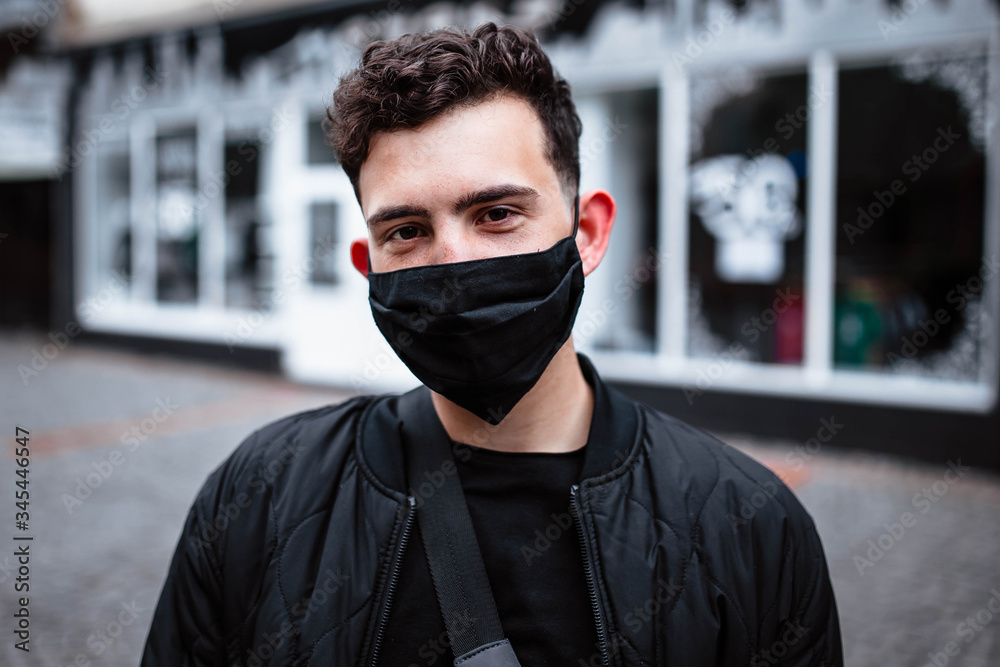

In [6]:
import torch
import requests

from PIL import Image, ImageDraw
from transformers import AutoImageProcessor, AutoModelForObjectDetection

url = "https://as2.ftcdn.net/v2/jpg/03/45/44/65/1000_F_345446547_G3V8kIennnRZGsHDCp5DMhqk32mIK5iQ.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [7]:
model_repo = "qubvel-hf/detr_finetuned_cppe5"
image_processor = AutoImageProcessor.from_pretrained(model_repo)
model = AutoModelForObjectDetection.from_pretrained(model_repo)
model = model.to(device)

In [8]:
with torch.no_grad():
    inputs = image_processor(images=[image], return_tensors="pt")
    outputs = model(**inputs.to(device))
    target_sizes = torch.tensor([[image.size[1], image.size[0]]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.3, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected Mask with confidence 0.573 at location [331.29, 236.25, 581.85, 411.7]


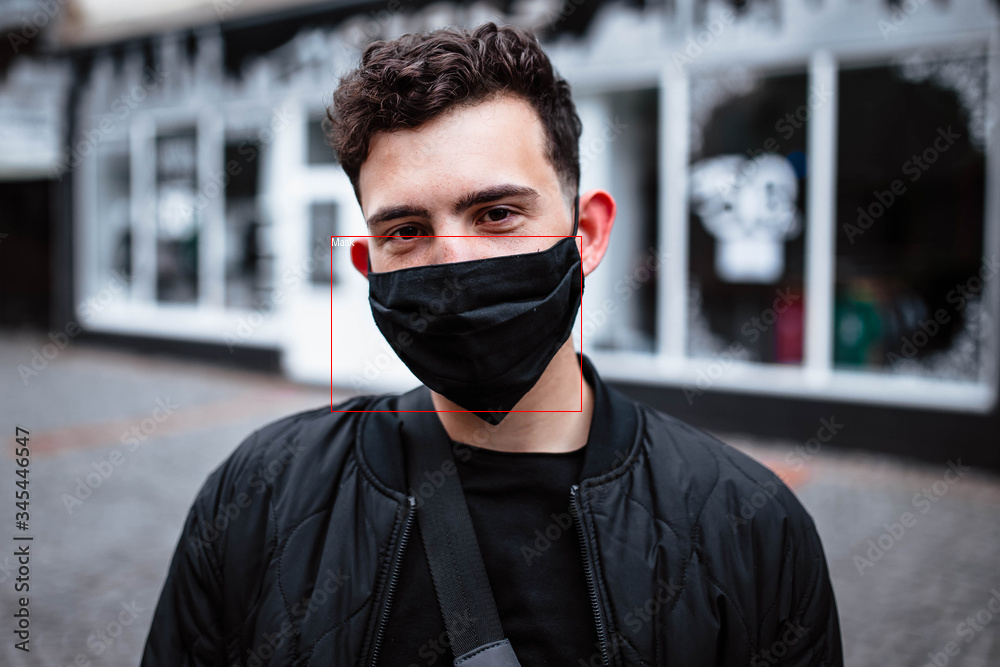

In [9]:
def add_bbox(draw, score, label, box):
    box = [round(i, 2) for i in box]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    txt = model.config.id2label[label] if not isinstance(label, str) else label
    draw.text((x, y), txt, fill="white")

for_automodel = image.copy()
draw = ImageDraw.Draw(for_automodel)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    add_bbox(draw, score, label.item(), box.tolist())

for_automodel

In [10]:
from transformers import pipeline

obj_detection_pipeline = pipeline("object-detection", model="qubvel-hf/detr_finetuned_cppe5")

Device set to use cuda:0


In [11]:
res = obj_detection_pipeline(image)[0]
res

{'score': 0.5734499096870422,
 'label': 'Mask',
 'box': {'xmin': 331, 'ymin': 236, 'xmax': 581, 'ymax': 411}}

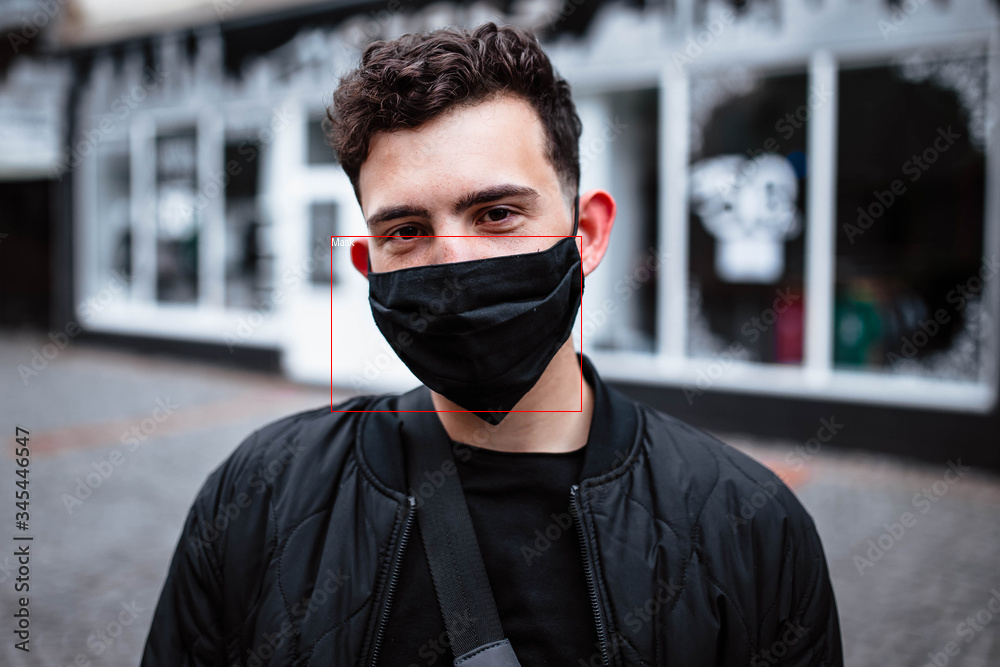

In [12]:
for_pipeline = image.copy()
draw = ImageDraw.Draw(for_pipeline)
add_bbox(draw, res["score"], res["label"], list(res["box"].values()))
for_pipeline

## Segmentation

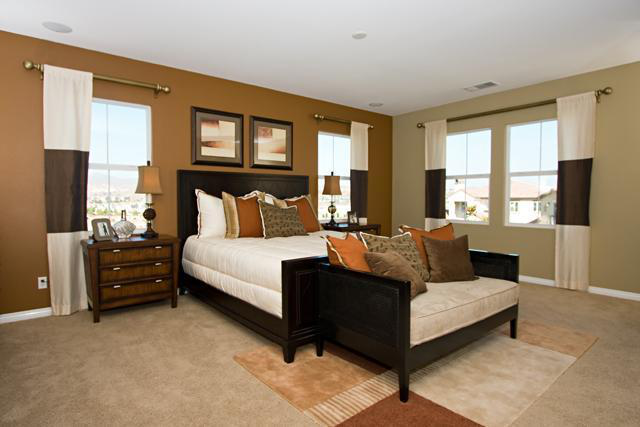

In [20]:
import torch
import requests

from PIL import Image, ImageDraw
from transformers import AutoImageProcessor, AutoModelForObjectDetection

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/semantic-seg-image.png"
image = Image.open(requests.get(url, stream=True).raw)
image

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from transformers import AutoModelForImageSegmentation

model = AutoModelForImageSegmentation.from_pretrained('briaai/RMBG-2.0', trust_remote_code=True)
torch.set_float32_matmul_precision(['high', 'highest'][0])
model.to('cuda')
model.eval()

# Data settings
image_size = (1024, 1024)
transform_image = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/semantic-seg-image.png"
image = Image.open(requests.get(url, stream=True).raw)
input_images = transform_image(image).unsqueeze(0).to('cuda')

# Prediction
with torch.no_grad():
    preds = model(input_images)[-1].sigmoid().cpu()
pred = preds[0].squeeze()
pred_pil = transforms.ToPILImage()(pred)
mask = pred_pil.resize(image.size)
image.putalpha(mask)

/home/voorhs/.pyenv/versions/.sirius-lectures/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/voorhs/.pyenv/versions/.sirius-lectures/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


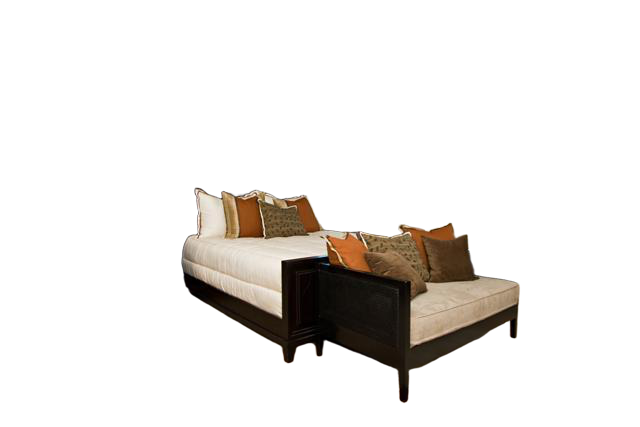

In [23]:
image

## Zero-shot object detection

In [1]:
from transformers import pipeline

checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

/home/voorhs/.pyenv/versions/.sirius-lectures/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0


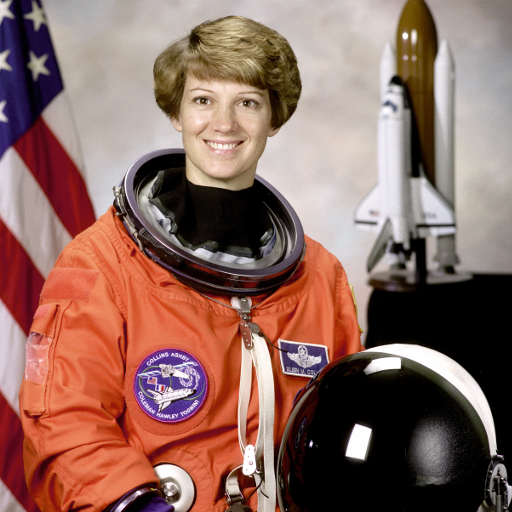

In [2]:
import skimage
import numpy as np
from PIL import Image

image = skimage.data.astronaut()
image = Image.fromarray(np.uint8(image)).convert("RGB")

image

In [3]:
predictions = detector(
    image,
    candidate_labels=["human face", "rocket", "nasa badge"],
)
predictions

[{'score': 0.6007459163665771,
  'label': 'nasa badge',
  'box': {'xmin': 132, 'ymin': 348, 'xmax': 208, 'ymax': 423}},
 {'score': 0.512611448764801,
  'label': 'nasa badge',
  'box': {'xmin': 278, 'ymin': 339, 'xmax': 329, 'ymax': 378}},
 {'score': 0.29185763001441956,
  'label': 'rocket',
  'box': {'xmin': 352, 'ymin': 26, 'xmax': 465, 'ymax': 288}},
 {'score': 0.22525499761104584,
  'label': 'rocket',
  'box': {'xmin': 429, 'ymin': 40, 'xmax': 458, 'ymax': 260}},
 {'score': 0.20486289262771606,
  'label': 'nasa badge',
  'box': {'xmin': 23, 'ymin': 330, 'xmax': 52, 'ymax': 384}},
 {'score': 0.19574858248233795,
  'label': 'rocket',
  'box': {'xmin': 395, 'ymin': -1, 'xmax': 438, 'ymax': 184}},
 {'score': 0.18185772001743317,
  'label': 'nasa badge',
  'box': {'xmin': 482, 'ymin': 454, 'xmax': 510, 'ymax': 511}},
 {'score': 0.16229234635829926,
  'label': 'nasa badge',
  'box': {'xmin': 294, 'ymin': 416, 'xmax': 307, 'ymax': 449}},
 {'score': 0.1373860090970993,
  'label': 'rocket',


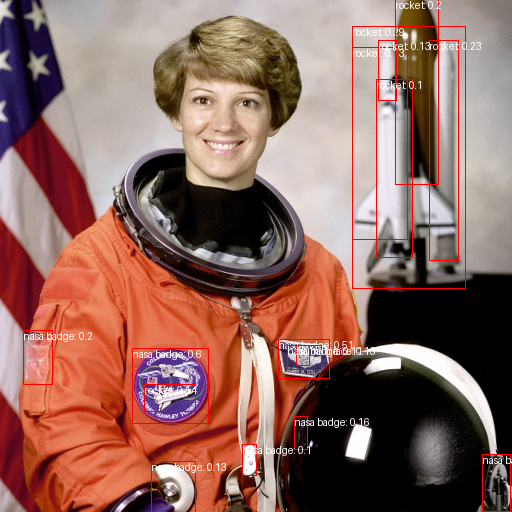

In [4]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image

## Zero-shot Classification

In [ ]:
from transformers import pipeline

checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification")

In [ ]:
from PIL import Image
import requests

url = "https://unsplash.com/photos/g8oS8-82DxI/download?ixid=MnwxMjA3fDB8MXx0b3BpY3x8SnBnNktpZGwtSGt8fHx8fDJ8fDE2NzgxMDYwODc&force=true&w=640"
image = Image.open(requests.get(url, stream=True).raw)

image

In [ ]:
predictions = detector(image, candidate_labels=["fox", "bear", "seagull", "owl"])
predictions

## Depth Estimation

In [ ]:
from transformers import pipeline
import torch
from accelerate.test_utils.testing import get_backend
device, _, _ = get_backend()
checkpoint = "depth-anything/Depth-Anything-V2-base-hf"
pipe = pipeline("depth-estimation", model=checkpoint, device=device)

In [ ]:
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/bee.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
predictions = pipe(image)

In [ ]:
predictions["depth"]